# Basic of Cluster Analysis

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Rely on the Sklearn for clustering
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv('2.1 3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

### Plot the latitude and longtitude just as on the map to show the similarity of coordination of these countries

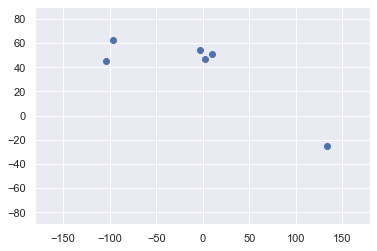

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
# Longtitude of the globe limit [-180,180]
plt.xlim(-180,180)

# Latitude of the globe limit [-90,90]
plt.ylim(-90,90)

plt.show()

## Select features

### DataFrame.iloc[row, column] slices the data frame, with the rows and columns to be kept
select all rows, put the colon (:) at first argument

In [6]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [24]:
kmeans = KMeans(3)
kmeans

KMeans(n_clusters=3)

In [25]:
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [26]:
identifies_cluster = kmeans.fit_predict(x)
identifies_cluster

array([1, 1, 0, 0, 0, 2])

In [27]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identifies_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


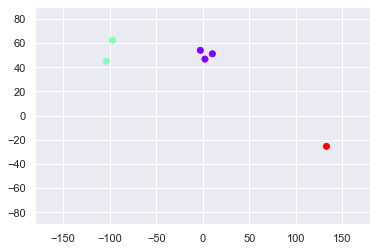

In [30]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
# Longtitude of the globe limit [-180,180]
plt.xlim(-180,180)

# Latitude of the globe limit [-90,90]
plt.ylim(-90,90)

plt.show()

# Clustering Categorical Data

## Map the data

In [31]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [41]:
language_to_cluster = data_mapped.iloc[:, 1:4]
language_to_cluster

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [42]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = kmeans.fit_predict(language_to_cluster)
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


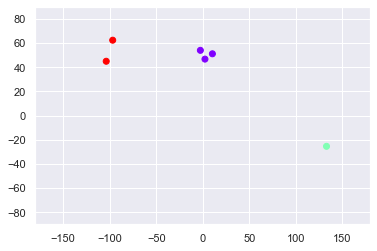

In [43]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
# Longtitude of the globe limit [-180,180]
plt.xlim(-180,180)

# Latitude of the globe limit [-90,90]
plt.ylim(-90,90)

plt.show()